# **Data Wrangling**

### Load dataset and describe its properties 

In [90]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime
import calendar
import math
import time

In [91]:
# Import data
df = pd.read_csv('202003-baywheels-tripdata.csv')

In [92]:
#check and test
df.head(n=3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
0,35187,2020-03-31 20:42:10.0790,2020-04-01 06:28:37.8440,462.0,Cruise Terminal at Pier 27,37.804648,-122.402087,24.0,Spear St at Folsom St,37.789677,-122.390428,10982,Customer,NaN
1,14568,2020-03-31 22:45:25.5010,2020-04-01 02:48:13.7730,42.0,San Francisco City Hall (Polk St at Grove St),37.778650,-122.418230,370.0,Jones St at Post St,37.787327,-122.413278,12617,Customer,NaN
2,35990,2020-03-31 15:08:22.3310,2020-04-01 01:08:12.9900,391.0,1st St at Younger Ave,37.355030,-121.904436,397.0,Gish Rd at 1st St,37.361867,-121.909315,12812,Customer,NaN


### Structure of the dataset

In [93]:
#get understanding of the number of entries
df.shape

(176799, 14)

There are 176799 and 14 features in dataset.

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176799 entries, 0 to 176798
Data columns (total 14 columns):
duration_sec               176799 non-null int64
start_time                 176799 non-null object
end_time                   176799 non-null object
start_station_id           110696 non-null float64
start_station_name         111349 non-null object
start_station_latitude     176799 non-null float64
start_station_longitude    176799 non-null float64
end_station_id             111097 non-null float64
end_station_name           111794 non-null object
end_station_latitude       176799 non-null float64
end_station_longitude      176799 non-null float64
bike_id                    176799 non-null int64
user_type                  176799 non-null object
rental_access_method       114269 non-null object
dtypes: float64(6), int64(2), object(6)
memory usage: 18.9+ MB


In [95]:
# checking if there is any duplicated data entry
print( 'Number of duplicats in data =' ,sum(df.duplicated()))

Number of duplicats in data = 0


In [96]:
# Get number of bikes in this dataset
print( 'Number of bikes in data =' ,df.bike_id.nunique())

Number of bikes in data = 8430


In [97]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,176799.000000,110696.000000,176799.000000,176799.000000,111097.000000,176799.000000,176799.000000,176799.000000
mean,861.590156,185.082261,37.732506,-122.339595,179.244228,37.731290,-122.335029,332033.876114
std,1528.143090,154.647521,0.170476,0.336403,153.858017,0.278159,0.788013,310588.686471
min,60.000000,3.000000,0.000000,-122.513814,3.000000,0.000000,-122.529747,17.000000
25%,374.000000,58.000000,37.763708,-122.421339,53.000000,37.763848,-122.420377,11695.000000
50%,602.000000,125.000000,37.776598,-122.403969,121.000000,37.776598,-122.403234,299042.000000
75%,963.000000,321.000000,37.789677,-122.390648,309.000000,37.789747,-122.390648,551560.000000
max,84450.000000,521.000000,37.880222,0.000000,521.000000,37.995942,0.000000,999960.000000


# **Data Preparation & Cleaning**

In [98]:
# Create copy of original data
df_clean = df.copy()

In [99]:
# check null values
df_clean.isnull().sum()

duration_sec                   0
start_time                     0
end_time                       0
start_station_id           66103
start_station_name         65450
start_station_latitude         0
start_station_longitude        0
end_station_id             65702
end_station_name           65005
end_station_latitude           0
end_station_longitude          0
bike_id                        0
user_type                      0
rental_access_method       62530
dtype: int64

In [100]:
# Drop null values
df_clean = df_clean.dropna()
df_clean = df_clean.reset_index(drop=True)

In [101]:
df_clean.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
rental_access_method       0
dtype: int64

In [102]:
# check user type value counts
df_clean['user_type'].value_counts()

Subscriber    26740
Customer       2817
Name: user_type, dtype: int64

In [103]:
# Convert time variables from string to datetime
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])
df_clean['end_time'] = pd.to_datetime(df_clean['end_time'])

In [104]:
# check earliest and latest trip date in the dataset
df_clean['start_time'].min(), df_clean['start_time'].max()

(Timestamp('2020-03-01 00:10:45'), Timestamp('2020-04-01 23:57:39'))

## **What is the structure of your dataset?**
- My dateset contains 176799 rows. There are 14 columns which are duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, rental_access_method. 
- Data types of columns are 4 objects, 2 datetimes, 2 integers and 6 floats.

## **What is/are the main areas(s) of interest in your dataset?**

I'm most interested in figuring out what the trip duration and Average trip times by user type and most visited stations, which are dependent on other columns (duration, user_type, start_station_name, end_station_name ...) in the dataset. 

## **What features in the dataset do you think will help support your investigation into your feature(s) of interest?**
The duration_sec column will be main feature to get the average trip times. duration_sec and user_type average trip per user_type.

Getting number of each user_type. start_station_id to get top 10 stations.

I guess that crowded places are more normal for leasing bicycles. 

I expect that rental_access_method, user_type, and bike_id assume a colossal job as well.
_____________________________________________________________________________

In [105]:
# convert seconds to minutes
df_clean.insert(1, 'duration_minutes', (df_clean['duration_sec']/60))
df_clean.head()

,duration_sec,duration_minutes,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
0,1772,29.533333,2020-03-31 15:23:58,2020-03-31 15:53:30,473.0,Willow St at Blewett Ave,37.309014,-121.900011,473.0,Willow St at Blewett Ave,37.309014,-121.900011,480691,Subscriber,app
1,737,12.283333,2020-03-26 16:24:05,2020-03-26 16:36:23,473.0,Willow St at Blewett Ave,37.309014,-121.900011,309.0,San Jose City Hall,37.337391,-121.886995,237580,Subscriber,app
2,253,4.216667,2020-03-15 18:51:36,2020-03-15 18:55:50,473.0,Willow St at Blewett Ave,37.309014,-121.900011,415.0,Delmas Ave at Virginia St,37.319757,-121.892999,239732,Subscriber,app
3,169,2.816667,2020-03-31 15:20:10,2020-03-31 15:23:00,473.0,Willow St at Blewett Ave,37.309014,-121.900011,473.0,Willow St at Blewett Ave,37.309014,-121.900011,439978,Subscriber,app
4,623,10.383333,2020-03-07 18:31:26,2020-03-07 18:41:50,473.0,Willow St at Blewett Ave,37.309014,-121.900011,406.0,Parkmoor Ave at Race St,37.316736,-121.910005,168502,Subscriber,app


In [106]:
df_clean['duration'] = df_clean['end_time'] - df_clean['start_time']
df_clean.head()

,duration_sec,duration_minutes,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method,duration
0,1772,29.533333,2020-03-31 15:23:58,2020-03-31 15:53:30,473.0,Willow St at Blewett Ave,37.309014,-121.900011,473.0,Willow St at Blewett Ave,37.309014,-121.900011,480691,Subscriber,app,00:29:32
1,737,12.283333,2020-03-26 16:24:05,2020-03-26 16:36:23,473.0,Willow St at Blewett Ave,37.309014,-121.900011,309.0,San Jose City Hall,37.337391,-121.886995,237580,Subscriber,app,00:12:18
2,253,4.216667,2020-03-15 18:51:36,2020-03-15 18:55:50,473.0,Willow St at Blewett Ave,37.309014,-121.900011,415.0,Delmas Ave at Virginia St,37.319757,-121.892999,239732,Subscriber,app,00:04:14
3,169,2.816667,2020-03-31 15:20:10,2020-03-31 15:23:00,473.0,Willow St at Blewett Ave,37.309014,-121.900011,473.0,Willow St at Blewett Ave,37.309014,-121.900011,439978,Subscriber,app,00:02:50
4,623,10.383333,2020-03-07 18:31:26,2020-03-07 18:41:50,473.0,Willow St at Blewett Ave,37.309014,-121.900011,406.0,Parkmoor Ave at Race St,37.316736,-121.910005,168502,Subscriber,app,00:10:24


# **Exploration**

## **Univariate Exploration**

> Investigate distributions of individual variables


Starting by looking at the distribution of all variables by getting histogram to all columns in dataset

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026EBFB2AF28>,
      dtype=object)

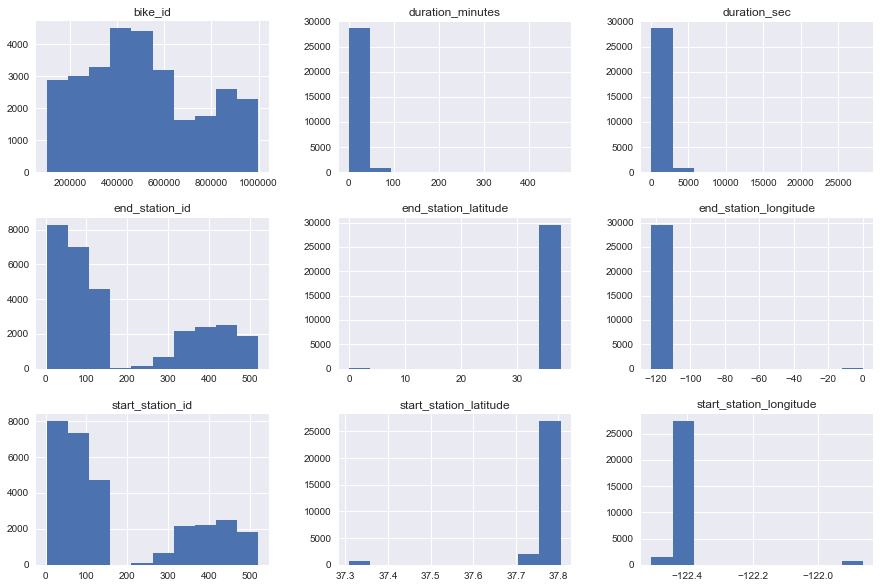

In [107]:
df_clean.hist(figsize = (15,10))

Average bike trips
---------------------------
I will performe a log transformation on trip duration due to the observed right skew.

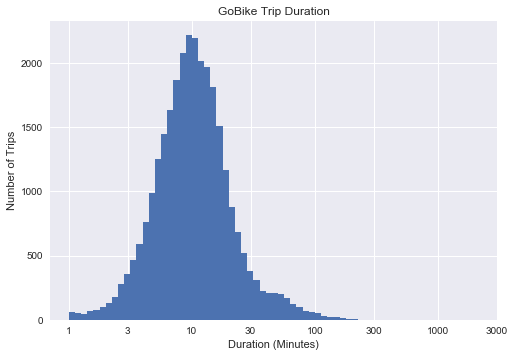

In [108]:
# create a histogram of duration on log scale
bins = 10 ** np.arange(0, 3+0.05, 0.05)
ticks = [1, 3, 10, 30, 100, 300, 1000, 3000]
labels = ['{}'.format(val) for val in ticks]

plt.figure()
plt.hist(data = df_clean, x = 'duration_minutes', bins = bins)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('Duration (Minutes)')
plt.ylabel('Number of Trips')
plt.title('GoBike Trip Duration');

**Average Bike Trip Duration.**

-The average bike lasts between 1 and to about 100 minutes.

-The most of bike trips lies between 3 minutes and 30 minutes.

-The majority of bike trips is around 10 minutes.
_________________________________________________________

### **Bike rides per day of the week**

Text(0.5, 1.0, 'GoBike by Day of the Week')

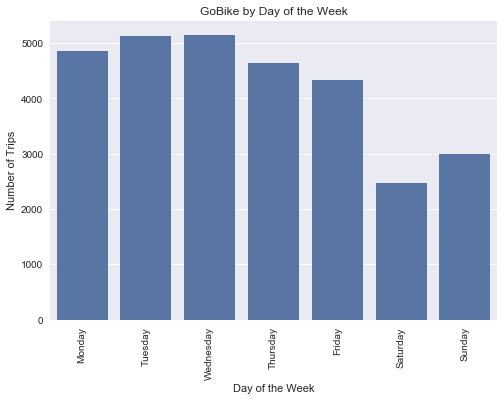

In [109]:
# bar chart counting trips per day of the week
df_clean['start_day_of_week'] = df_clean['start_time'].dt.weekday

plt.figure()
sb.countplot(data = df_clean, x = 'start_day_of_week', color = sb.color_palette()[0])

ticks = [0, 1, 2, 3, 4, 5, 6]
labels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.xticks(ticks, labels, rotation = 90)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.title('GoBike by Day of the Week')

It is shown that there are trips in all days of the week.

Tuesday and wednesday have the more trips a bit than others.

Saturday and sunday are  the less day in bike trips.

Count of bike trips by user type 
-----------------------------------------

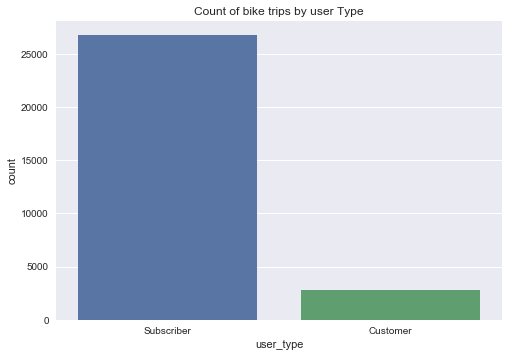

In [110]:
#use countplot to know numbers of each user type in dataset
sb.countplot(data=df_clean,x='user_type')
plt.title('Count of bike trips by user Type');

From the above chart, It is shown that the subscriber user type has the most count bike trips. since subscriber has count bike trips above 25000, while custumer has below 5000.

Count of bike trips by types of access methods 
-----------------------------------------

Text(0, 0.5, 'Number of users')

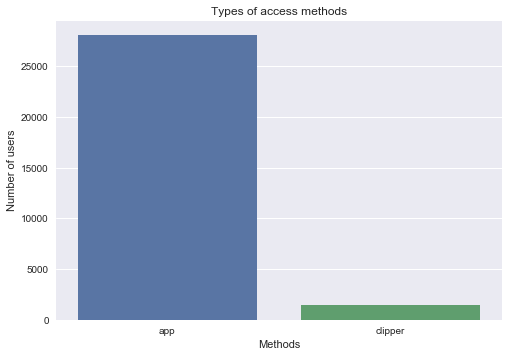

In [111]:
# bar chart to count trips by types of access methods
sb.countplot(data = df_clean, x = 'rental_access_method')
plt.title('Types of access methods')
plt.xlabel('Methods')
plt.ylabel('Number of users')

It is shown that the app access method has the majority in average bike trip. since app has Average bike trip above 25000, while clipper has below 5000.
__________________________________________________________________________

Represent and visualize the top 10 station where Trips are start and end
--------------------------------------------------------------------------

In [112]:
print(len(df_clean['start_station_name'].value_counts()))
df_clean['start_station_name'].value_counts()


296


San Francisco Caltrain (Townsend St at 4th St)    648
Market St at 10th St                              578
Berry St at 4th St                                494
Powell St BART Station (Market St at 4th St)      433
Market St at Steuart St                           415
                                                 ... 
Parkmoor Ave at Race St                             1
South San Jose State (7th St at Humboldt St)        1
5th St at Taylor St                                 1
21st St at Santa Clara St                           1
Columbia Ave at Bird Ave                            1
Name: start_station_name, Length: 296, dtype: int64

In [113]:
df_clean['end_station_name'].value_counts()

San Francisco Caltrain (Townsend St at 4th St)      812
Market St at 10th St                                557
Montgomery St BART Station (Market St at 2nd St)    553
Berry St at 4th St                                  519
Powell St BART Station (Market St at 4th St)        478
                                                   ... 
SAP Center                                            1
23rd St at Taylor St                                  1
San Carlos St at 11th St                              1
Willow St at Vine St                                  1
Bird Ave at Willow St                                 1
Name: end_station_name, Length: 304, dtype: int64

There are 296 stations in this dataset. I will focus on Top 10 stations with the most trips.

Text(0.5, 0, 'Number of rider per station')

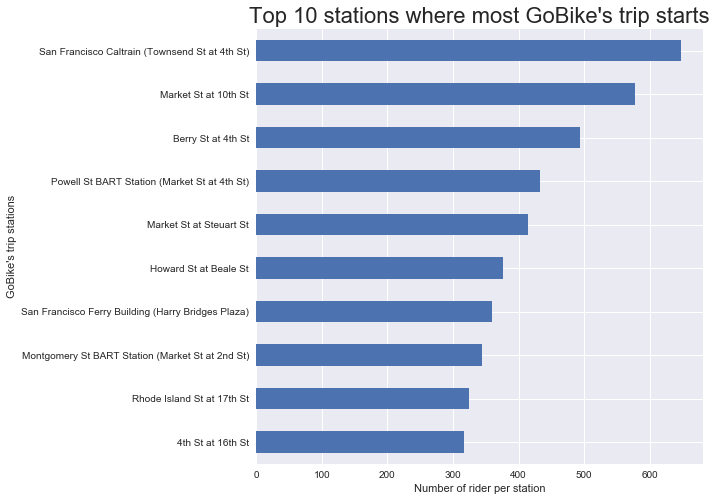

In [114]:
Top_10 = df_clean["start_station_name"].value_counts()[:10]

fig = plt.figure(figsize=(8,8))
Top_10.sort_values(ascending=True).plot(kind='barh')
plt.title("Top 10 stations where most GoBike's trip starts",fontsize=22)
plt.ylabel("GoBike's trip stations")
plt.xlabel("Number of rider per station")

As it is shown that: 

San Francisco Caltrain (Townsend St at 4th St),
Market St at 10th st, Berry St at 4th St, Powell St BART Station (Market St at 4th St), Market St at Steuart St.
are top stations where most GoBike's trip starts.  

Text(0.5, 0, 'Number of rider per station')

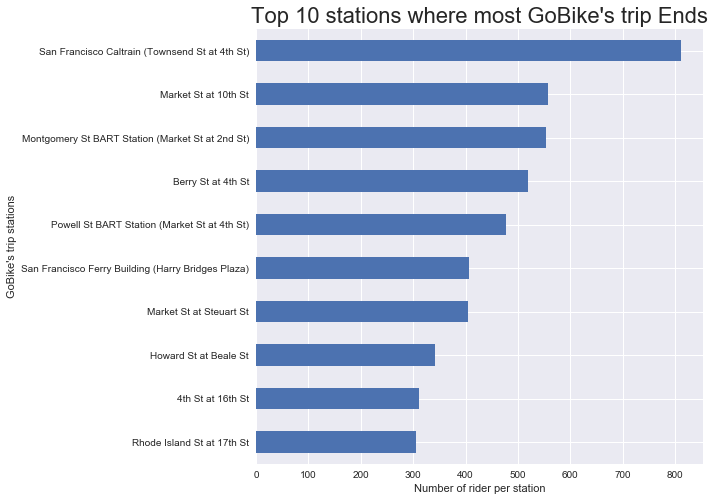

In [115]:
Top_10 = df_clean["end_station_name"].value_counts()[:10]

fig = plt.figure(figsize=(8,8))
Top_10.sort_values(ascending=True).plot(kind='barh')
plt.title("Top 10 stations where most GoBike's trip Ends",fontsize=22)
plt.ylabel("GoBike's trip stations")
plt.xlabel("Number of rider per station")

As it is shown that: 

(San Francisco Caltrain (Townsend St at 4th St), Market St at 10th St ,Montgomery St BART Station (Market St at 2nd St),Berry St at 4th St ,Powell St BART Station )are top stations where most GoBike's trip ends.

There are no big change in top 10 stations of GoBike's trip starts or ends.
I see that these stations are the most visited stations.

## **Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?**

**Convert Trip Duration to Minutes**
I think it would be more natural to look at bike trip durations in minutes 
rather than seconds.

**Applying a log transformation on trip duration**
After apply histogram to all variables I observe right skew in duration, so I apply log to better visulization.

**Extract weekday from start time**
To get Bike rides per day of the week. 
___________________________________________________________________________

## **Bivariate Exploration**


>  Investigate relationships between pairs of variables



Get the Relation between the variables
-----------------------------------------------------------------------

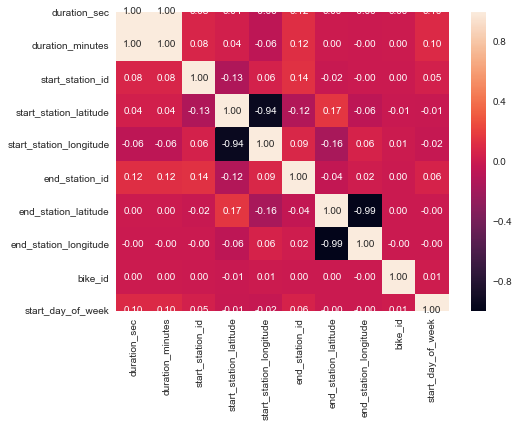

In [116]:
f, ax = plt.subplots()
corr = df_clean.corr()
sb.heatmap(corr, cbar = True, annot=True, square = True, fmt = '.2f', xticklabels=corr.columns.values, yticklabels=corr.columns.values)

The above chart represent correlation between variables

The correlation between start station latitude and end station latitude is 0.17
and this is consider weak correlation or there is no strong relation between where the trip start and end.

Trip Counts by Subscription Status and Day of Week
------------------------------------------------------------------

Text(0.5, 1.0, 'GoBike by Subscription Status and Day of Week')

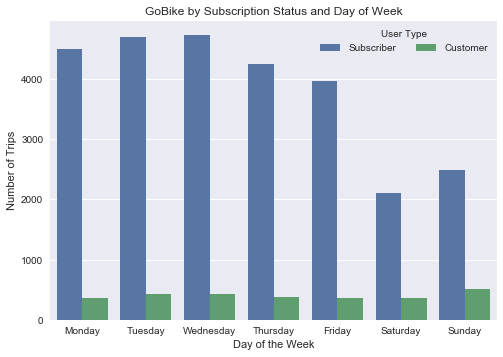

In [117]:
# create a clustered bar chart showing usage by day of the week and user type
plt.figure()
ax = sb.countplot(data = df_clean, x = 'start_day_of_week', hue = 'user_type')
ax.legend(loc = 1, ncol = 2, framealpha = 1, title = 'User Type')

ticks = [0, 1, 2, 3, 4, 5, 6]
labels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.xticks(ticks, labels)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.title('GoBike by Subscription Status and Day of Week')

The above chart show trip counts by subscriper is much more than trip counts by customer in each day of week. this is since number of subscriper is greater number of customer.

By Subscriper, Saturday and Sunday have the less bike trips.

By Customer, Sunday are the most bike trips.

Relation between the day usage of bike in minutes
------------------------------------------------------------------

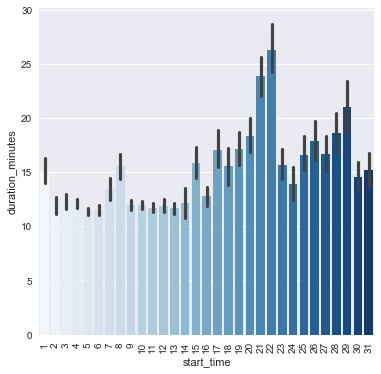

In [126]:
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize = [6,6])
day = df_clean['start_time'].dt.day
sb.barplot(data = df_clean, x = day, y = 'duration_minutes', palette = 'Blues')
plt.xticks(rotation=90)
plt.show()

It is seems that last of month has the most duration of trips.

The 2 days (21,22) have the most duration of trips.

Trip duration and Rental access method
---------------------------------------------------------

Text(0, 0.5, 'Duration seconds')

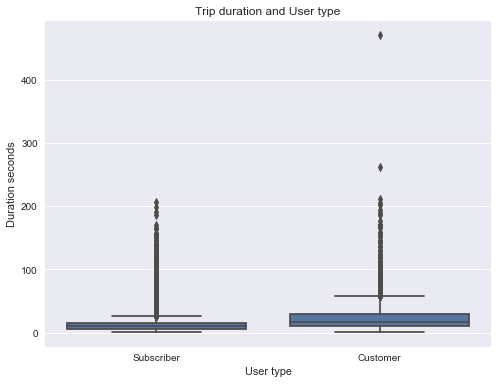

In [129]:
plt.figure(figsize=[8,6])
base_color = sb.color_palette()[0]
sb.boxplot(data = df_clean, x = 'user_type', y = 'duration_minutes', color=base_color)

plt.title('Trip duration and User type')
plt.xlabel('User type')
plt.ylabel('Duration seconds')

As seen from above chart the medium of duration for customer is much than medium of duration for subscriber.

This is mean that customer trips is longer or (have or time) than subscriber trips.

### Average trip duration per user type

Text(0.5, 0, 'user type')

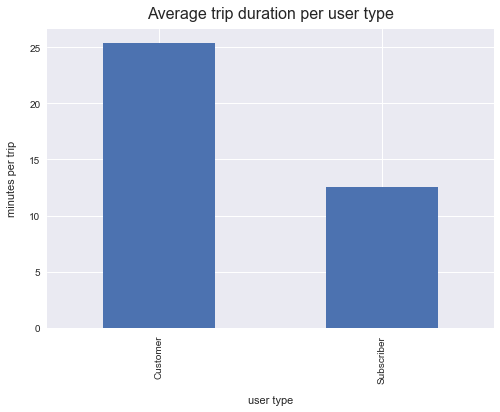

In [132]:

avg = df_clean.groupby('user_type')['duration_minutes'].mean().plot(kind='bar')
avg.set_title('Average trip duration per user type', fontsize=16, y=1.015)
avg.set_ylabel('minutes per trip', labelpad=12)
avg.set_xlabel('user type', labelpad=12)

This chart shown that average trip duration by customer is more that trip duration by subscriber

## **Distribution of start and end point using latitude and longitude**

We want to know what are the most common places where people tend to use our service. So that we can attend that demand and transform it into profit



Text(0, 0.5, 'longitude')

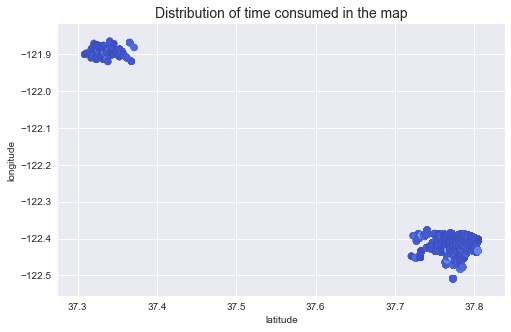

In [134]:
import seaborn as sbn
plt.figure(figsize = (8,5))
plt.scatter(data = df_clean, x = 'start_station_latitude', y = 'start_station_longitude', c = 'duration_minutes',
           cmap = 'coolwarm')

plt.title('Distribution of time consumed in the map',fontsize = 14)
plt.xlabel('latitude',fontsize=10)
plt.ylabel('longitude',fontsize = 10)

- The group located in the bottom part of the screen has more time consumed

### **Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?**
As a result, we can see that:
-

-While number of subscribers is more than customers,average trip duration by customer is more that trip duration by subscriber

-Sunday is the less day for subscribers and the most for customers in number of trips

-More extended long trips identified with the beginning station and end station.

# **Multivariate Exploration**
> Plots of three or more variables to investigate data even further.




Relation between Trip duration, User type and Rental access method
----------------------------------------------

<Figure size 576x396 with 0 Axes>

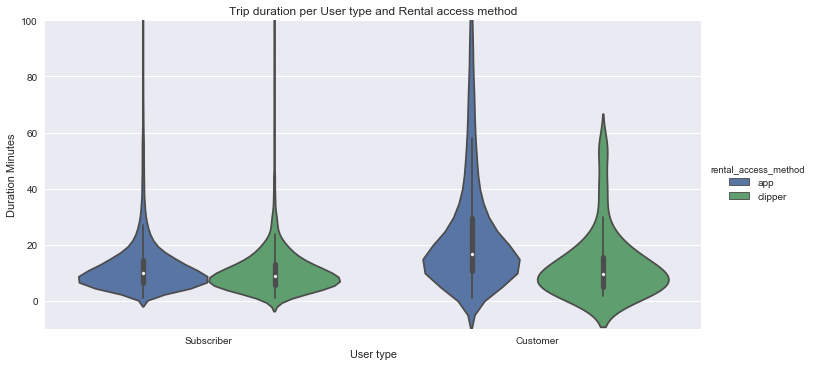

In [135]:
plt.figure()
sb.catplot(data=df_clean, x='user_type', y='duration_minutes', hue = 'rental_access_method', kind='violin', height=5, aspect=2)

plt.title('Trip duration per User type and Rental access method')
plt.xlabel('User type')
plt.ylabel('Duration Minutes')
plt.ylim(-10, 100);  

It is seen that customer have more Duration of there trips.

Users use app access method have Duration of there trips.

In [138]:
df_clean.columns

Index(['duration_sec', 'duration_minutes', 'start_time', 'end_time',
       'start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'rental_access_method', 'duration', 'start_day_of_week'],
      dtype='object')

Relation between Trip Duration, user type, and week
-------------------------------------------------------------------

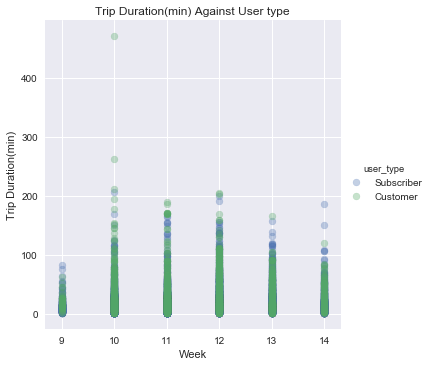

In [139]:
# Finding out how the average trip time is affected by user type and week.
df_clean['start_week'] = df_clean['start_time'].dt.week

g = sb.FacetGrid(data =  df_clean, hue = 'user_type',height = 5)
g.map(plt.scatter, 'start_week','duration_minutes', alpha = 1/3)
g.add_legend()
plt.title('Trip Duration(min) Against User type')
plt.xlabel('Week')
plt.ylabel('Trip Duration(min)');

It is shown that each week has trips from customer and subscripers, subscripers have most number of trips and customers have most duration time per trip.

Relation between Trip Duration, user type, and bike_id
------------------------------------------------------------------------------

Text(0, 0.5, 'Duration Minutes')

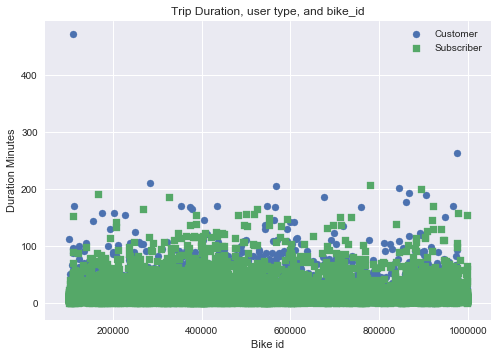

In [136]:
plt.figure()

for u, m in [['Customer', 'o'],['Subscriber', 's']]:
    df_type = df_clean[df_clean['user_type'] == u]
    plt.scatter(df_type['bike_id'], df_type['duration_minutes'], marker = m, alpha= 1)
    
plt.legend(['Customer','Subscriber'])

plt.title('Trip Duration, user type, and bike_id')
plt.xlabel('Bike id')
plt.ylabel('Duration Minutes')

**As we see the plot isn't perfect. So I have to make separate plots**

C:\Users\DINA\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


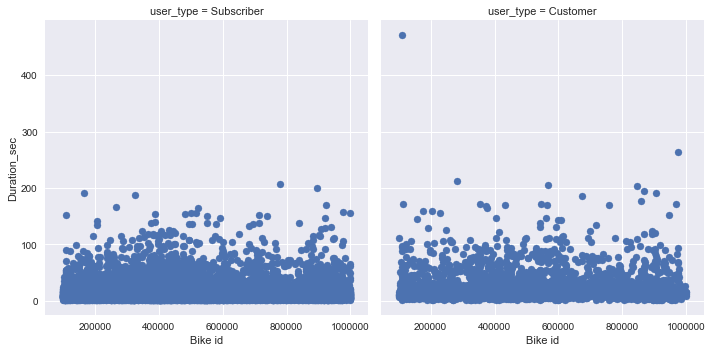

In [125]:
user_type = sb.FacetGrid(data = df_clean, col = 'user_type', col_wrap = 2, size = 5)
user_type.map(plt.scatter, 'bike_id', 'duration_minutes', alpha= 1)

user_type.set_xlabels('Bike id')
user_type.set_ylabels('Duration_sec')

As seen each of customer and subscriber uses many bikes, Number of bikes used by subscriber is more that Number of bikes used by customer.

### **Were there any interesting or surprising interactions between features?**
Strangely endorsers take bicycles not exactly frequently. Though clients take bicycles all the time and outing term is likewise long.